**PREDICTIVE ANALYSIS OF HEART DISEASE** <br>
Accuracy = 85.32%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/ES241JK/Downloads/Heart_Disease/Heart_Disease/Heart_Disease.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
###Seperating Numerics & Categories####
numerical = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
categorical = ['Sex','ChestPainType','FastingBS','RestingECG','ST_Slope','ExerciseAngina','HeartDisease']

In [8]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
Y = df['HeartDisease'].values

In [10]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
#Sex
df['Sex'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,Up,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sex', ylabel='Density'>

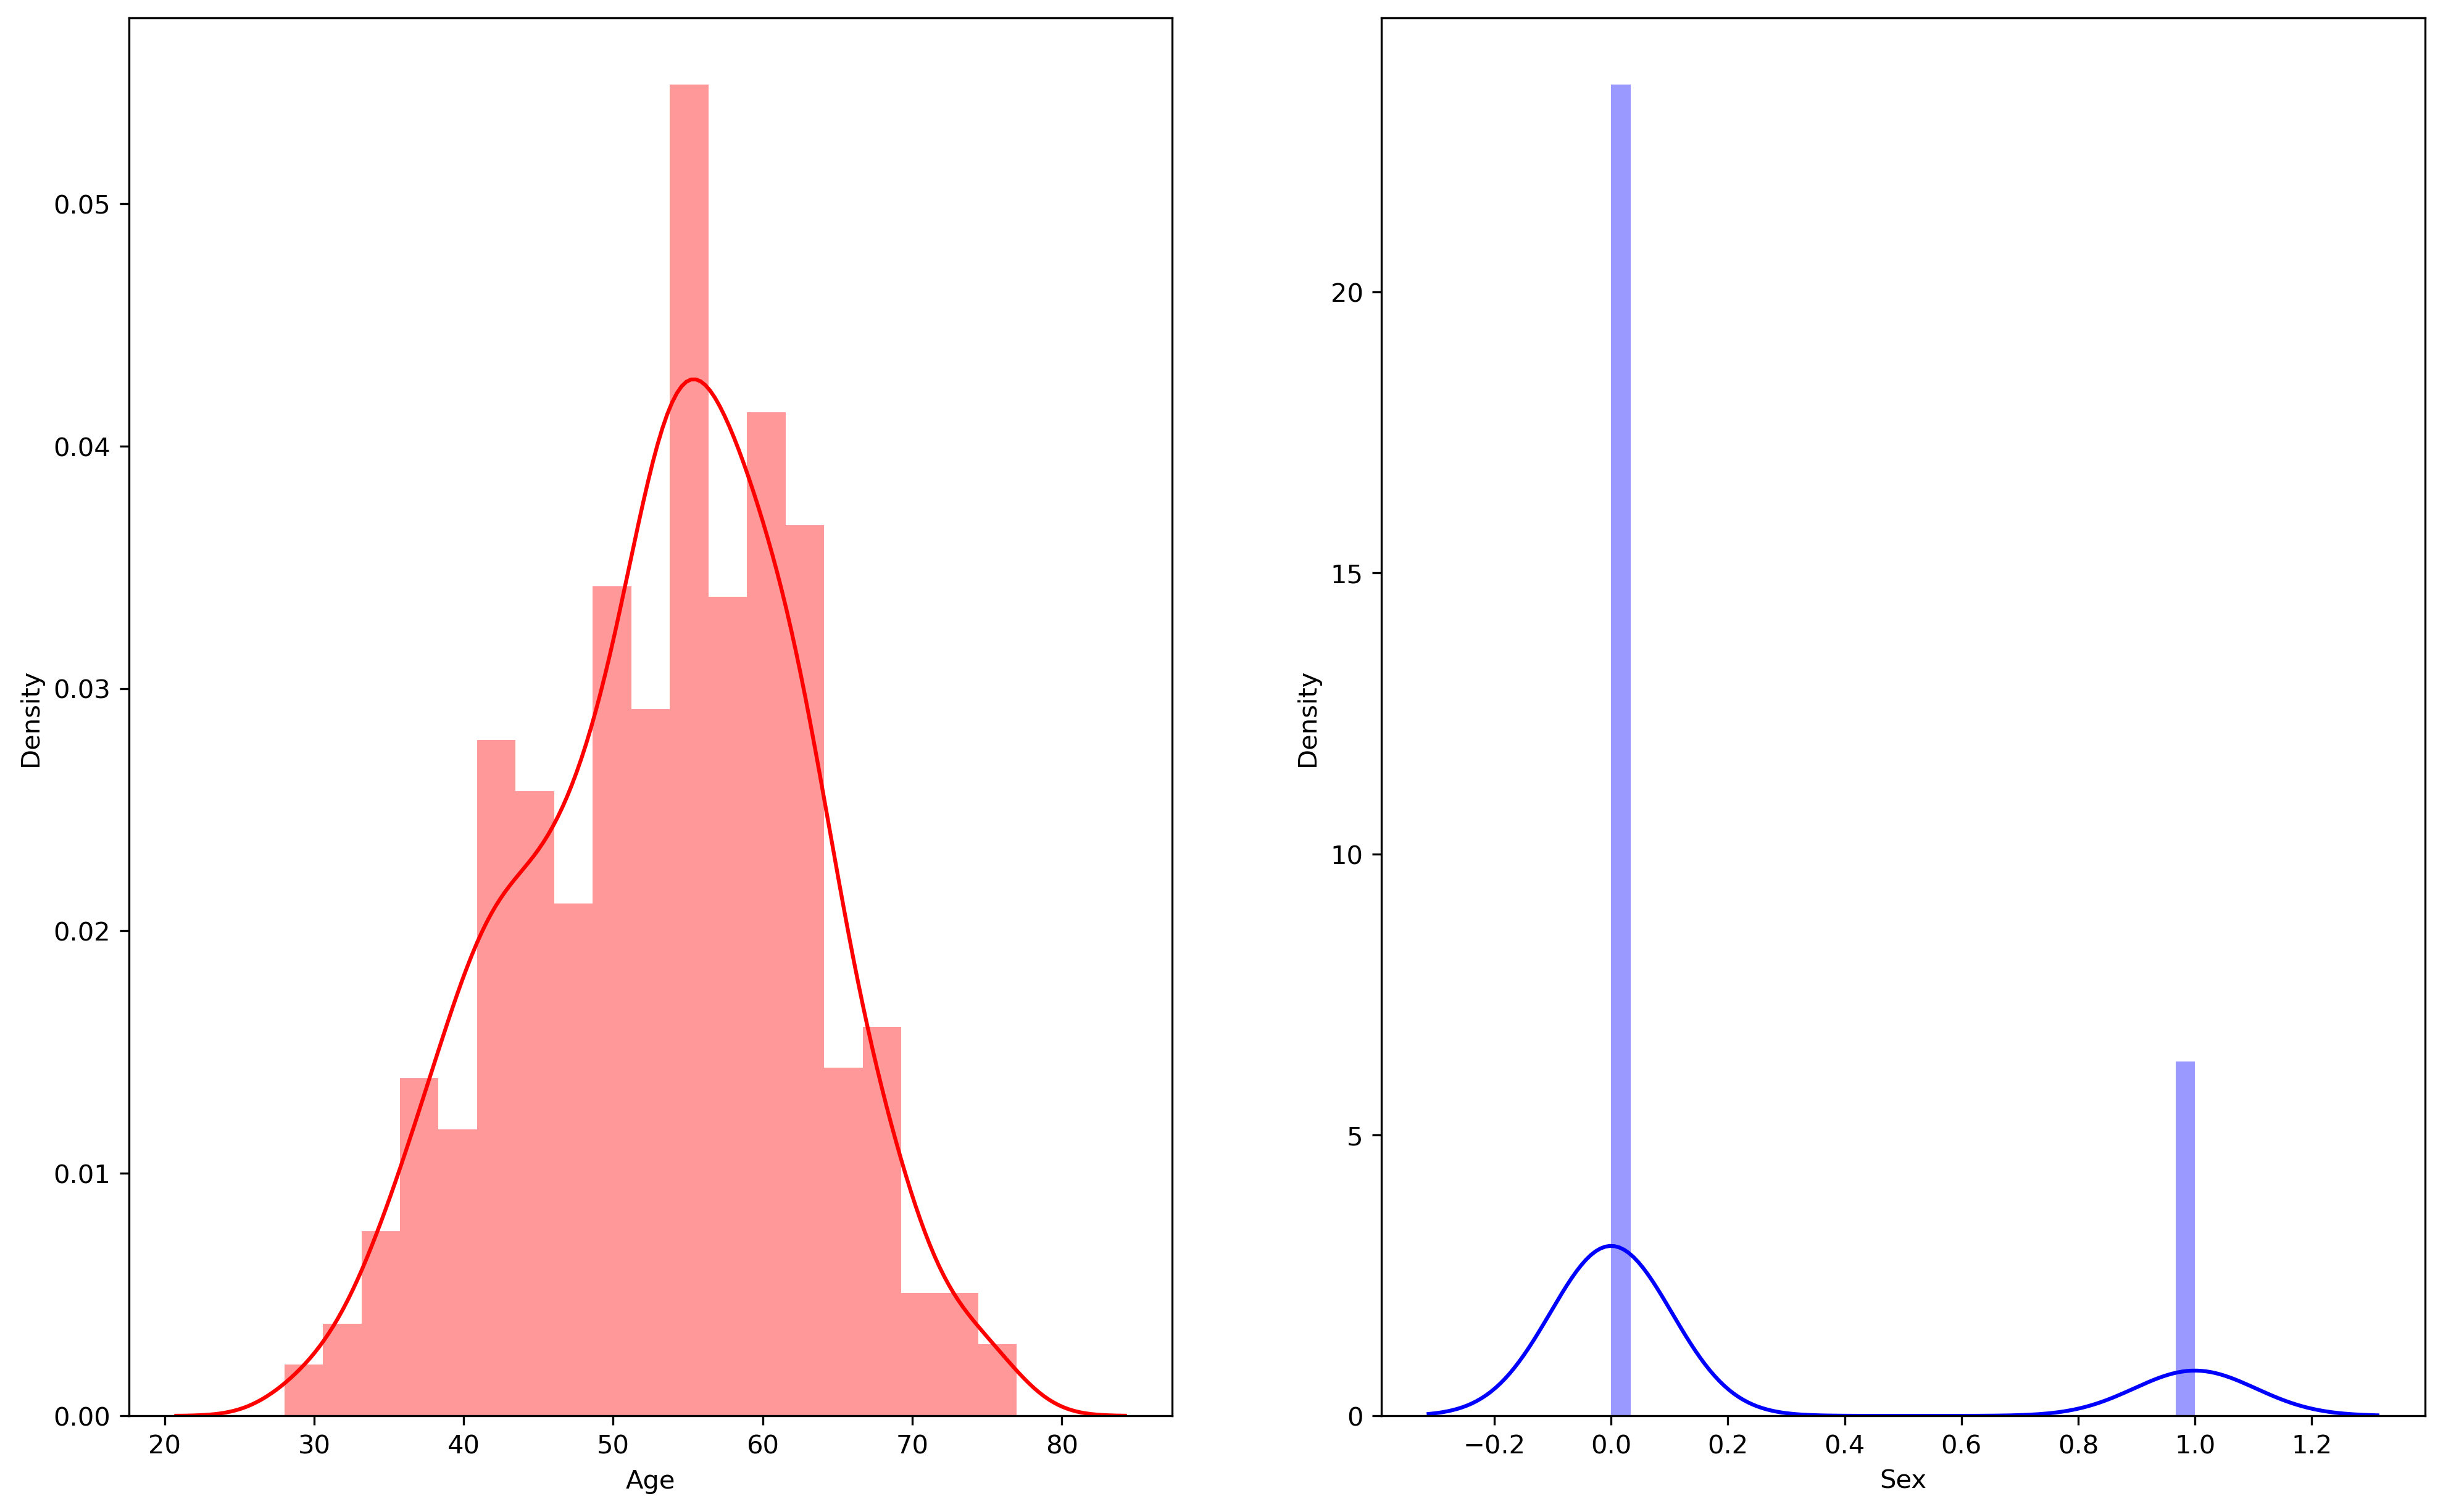

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10), dpi=300)
sns.distplot(df["Age"], ax=ax1, color="Red")
sns.distplot(df["Sex"], ax=ax2, color="Blue")

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

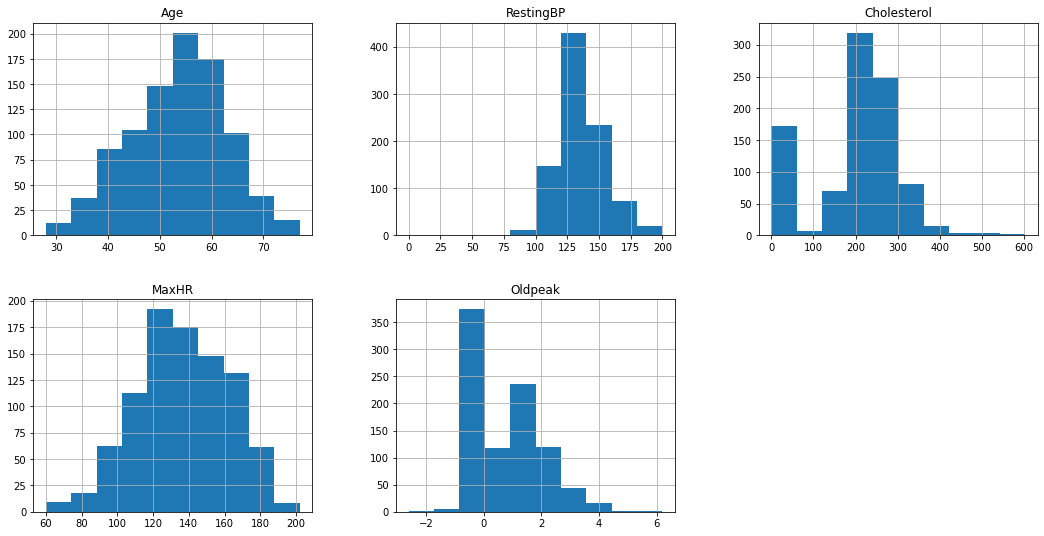

In [13]:
df[numerical].hist(figsize=(18,9),layout=(2,3))

<center>  <b>Changing Categorical into numeric data

In [14]:
# ChestPainType 
ChestPainType_dummies = pd.get_dummies(df["ChestPainType"])
df = pd.concat([df,ChestPainType_dummies],axis=1)
df.drop('ChestPainType',axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,0,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,1,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,0,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,1,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,0,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0


In [15]:
#RestingECG
RestingECG_dummies = pd.get_dummies(df["RestingECG"])
df = pd.concat([df,RestingECG_dummies],axis=1)
df.drop('RestingECG',axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST
0,40,0,140,289,0,172,N,0.0,Up,0,0,1,0,0,0,1,0
1,49,1,160,180,0,156,N,1.0,Flat,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,N,0.0,Up,0,0,1,0,0,0,0,1
3,48,1,138,214,0,108,Y,1.5,Flat,1,1,0,0,0,0,1,0
4,54,0,150,195,0,122,N,0.0,Up,0,0,0,1,0,0,1,0


In [16]:
#ExerciseAngina
ExerciseAngina_dummies = pd.get_dummies(df["ExerciseAngina"])
df = pd.concat([df,ExerciseAngina_dummies],axis=1)
df.drop('ExerciseAngina',axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y
0,40,0,140,289,0,172,0.0,Up,0,0,1,0,0,0,1,0,1,0
1,49,1,160,180,0,156,1.0,Flat,1,0,0,1,0,0,1,0,1,0
2,37,0,130,283,0,98,0.0,Up,0,0,1,0,0,0,0,1,1,0
3,48,1,138,214,0,108,1.5,Flat,1,1,0,0,0,0,1,0,0,1
4,54,0,150,195,0,122,0.0,Up,0,0,0,1,0,0,1,0,1,0


In [17]:
#ST_Slope
ST_Slope_dummies = pd.get_dummies(df["ST_Slope"])
df = pd.concat([df,ST_Slope_dummies],axis=1)
df.drop('ST_Slope',axis=1,inplace=True)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,0,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,1,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,0,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,1,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


In [18]:
X=df
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,0,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,1,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,0,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,1,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,1.2,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,0,144,193,1,141,3.4,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,0,130,131,0,115,1.2,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,1,130,236,0,174,0.0,1,0,1,0,0,1,0,0,1,0,0,1,0


In [19]:
X.to_csv("C:/Users/ES241JK/Downloads/Heart_Disease/Heart_Disease/PREDICTION_SAMPLES.csv")

In [20]:
pwd

'C:\\Users\\ES241JK\\Downloads\\Heart_Disease\\Heart_Disease'

# Building a Model

In [21]:
X.drop(['HeartDisease'], axis=1, inplace=True)
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,0,140,289,0,172,0.0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,1,160,180,0,156,1.0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,0,130,283,0,98,0.0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,1,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,150,195,0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1


In [22]:
# transforming the data
###transform = preprocessing.StandardScaler()
##X = transform.fit(X).transform(X)

In [23]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,0,140,289,0,172,0.0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,1,160,180,0,156,1.0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,0,130,283,0,98,0.0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,1,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,150,195,0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,1.2,0,0,0,1,0,1,0,1,0,0,1,0
914,68,0,144,193,1,141,3.4,1,0,0,0,0,1,0,1,0,0,1,0
915,57,0,130,131,0,115,1.2,1,0,0,0,0,1,0,0,1,0,1,0
916,57,1,130,236,0,174,0.0,0,1,0,0,1,0,0,1,0,0,1,0


In [24]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,0,140,289,0,172,0.0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,1,160,180,0,156,1.0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,0,130,283,0,98,0.0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,1,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0
4,54,0,150,195,0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264,0,132,1.2,0,0,0,1,0,1,0,1,0,0,1,0
914,68,0,144,193,1,141,3.4,1,0,0,0,0,1,0,1,0,0,1,0
915,57,0,130,131,0,115,1.2,1,0,0,0,0,1,0,0,1,0,1,0
916,57,1,130,236,0,174,0.0,0,1,0,0,1,0,0,1,0,0,1,0


In [25]:
#MODEL
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [26]:
X_test.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
440,52,0,128,0,0,180,3.0,0,0,1,0,0,0,1,1,0,0,0,1
382,43,0,115,0,0,145,2.0,1,0,0,0,0,1,0,0,1,0,1,0
567,71,0,130,221,0,115,0.0,1,0,0,0,0,0,1,0,1,0,1,0
230,37,0,130,315,0,158,0.0,1,0,0,0,0,1,0,1,0,0,0,1
470,53,0,126,0,0,106,0.0,1,0,0,0,0,1,0,1,0,0,1,0


LOGISTIC REGRESSION MODEL

In [27]:
from sklearn.linear_model import LogisticRegression
TrainingModel = LogisticRegression()
TrainingModel.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
print("LOGISTIC_REGRESSION_Model_Accuracy: ")
LOGISTIC_REGRESSION_Model_Accuracy = TrainingModel.score(X_test, Y_test)*100,"%"
print(LOGISTIC_REGRESSION_Model_Accuracy)

LOGISTIC_REGRESSION_Model_Accuracy: 
(83.69565217391305, '%')


In [29]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['no heart disease', 'heart disease identified']); ax.yaxis.set_ticklabels(['no heart disease', 'heart disease identified'])

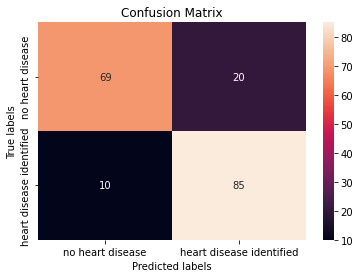

In [30]:
out=TrainingModel.predict(X_test)
plot_confusion_matrix(Y_test,out)

DECISION TREE MODEL

In [31]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier()
DTmodel.fit(X_train, Y_train)

DecisionTreeClassifier()

In [32]:
DTmodel.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
print("Decision_Tree_Model Accuracy:", end=" ") 
DT_Model=DTmodel.score(X_test, Y_test)*100,"%"
print(DT_Model)

Decision_Tree_Model Accuracy: (75.54347826086956, '%')


SVM MODEL

In [34]:
from sklearn.svm import SVC
SVMmodel = SVC(kernel="rbf", gamma= 0.001)

In [35]:
SVMmodel.fit(X_train, Y_train)

SVC(gamma=0.001)

In [36]:
print("SVM_Model Accuracy:", end=" ") 
SVM = SVMmodel.score(X_test, Y_test)*100,"%"
print(SVM)

SVM_Model Accuracy: (74.45652173913044, '%')


In [37]:
print("Decision_Tree_Model Percentage:", DT_Model)
print("SVM_Model Percentage:", SVM)
print("Logistic_Regression_Model Percentage:", LOGISTIC_REGRESSION_Model_Accuracy)
models = {'DecisionTree': DTmodel.score,
         'SVM_Model': SVMmodel.score,
         'Logistic_Regression': TrainingModel.score}

best_model = max(models)
print('The best model is',best_model)

Decision_Tree_Model Percentage: (75.54347826086956, '%')
SVM_Model Percentage: (74.45652173913044, '%')
Logistic_Regression_Model Percentage: (83.69565217391305, '%')
The best model is SVM_Model


In [38]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("heartdisease.pkl","wb")
pickle.dump(SVMmodel, pickle_out)
pickle_out.close()
print("heartdisease pickle is created")

heartdisease pickle is created


In [39]:
pwd

'C:\\Users\\ES241JK\\Downloads\\Heart_Disease\\Heart_Disease'